In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os


In [32]:
path = kagglehub.dataset_download("bitext/bitext-gen-ai-chatbot-customer-support-dataset")
files = os.listdir(path)
print("Files in dataset:", files)

csv_files = [f for f in files if f.endswith(".csv")]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))  # Load the first CSV file
    print(df.head())
else:
    print("No CSV files found in the dataset.")


Files in dataset: ['Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11.csv']
   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [34]:
df.describe()

,flags,instruction,category,intent,response
count,26872,26872,26872,26872,26872
unique,394,24635,11,27,26870
top,BL,shipments to {{Delivery City}},ACCOUNT,edit_account,"Firstly, I truly understand how pivotal the {{..."
freq,5212,8,5986,1000,2


In [35]:
df.isnull().sum()

flags          0
instruction    0
category       0
intent         0
response       0
dtype: int64

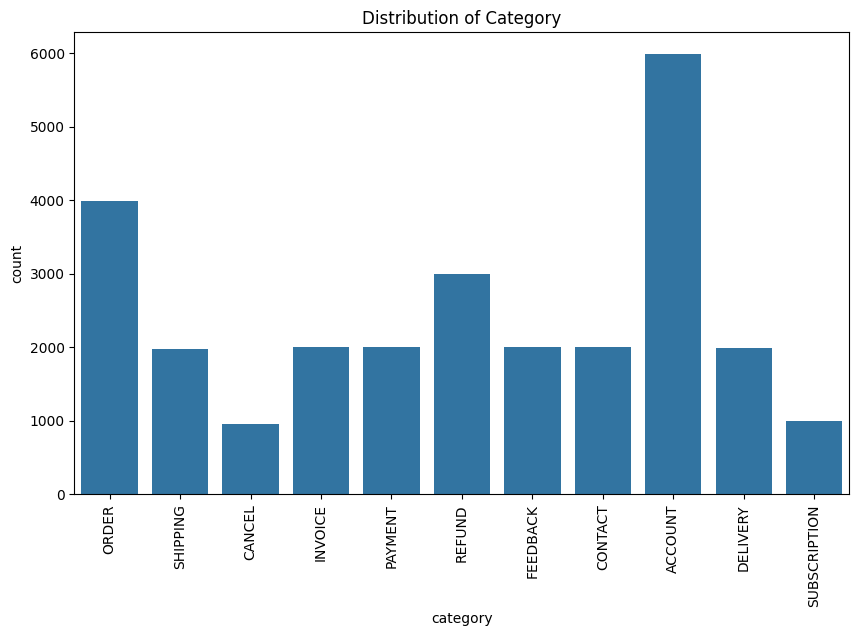

In [36]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.xticks(rotation=90)
plt.title("Distribution of Category")
plt.show()


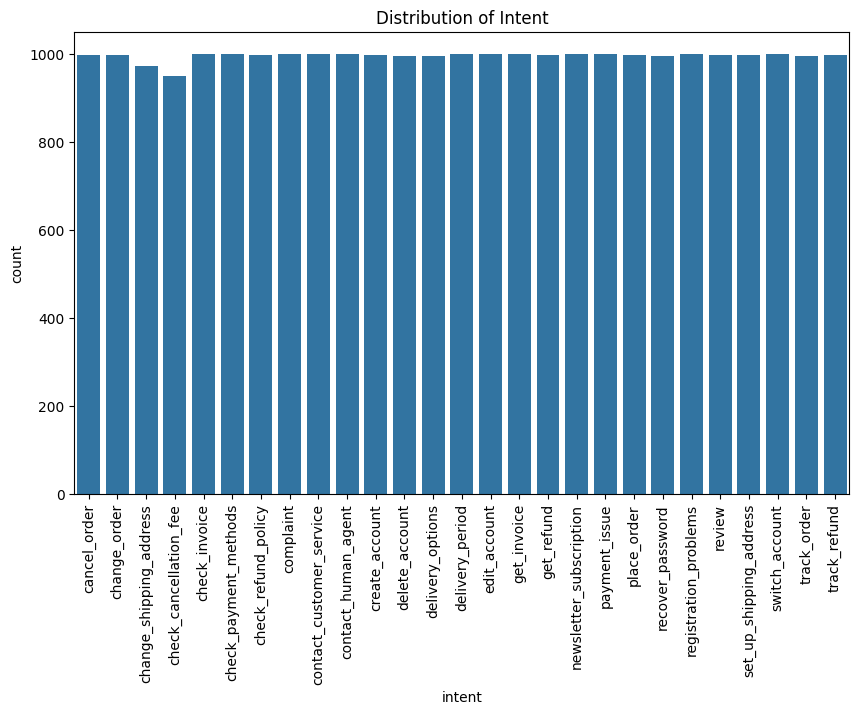

In [37]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='intent')
plt.xticks(rotation=90)
plt.title("Distribution of Intent")
plt.show()


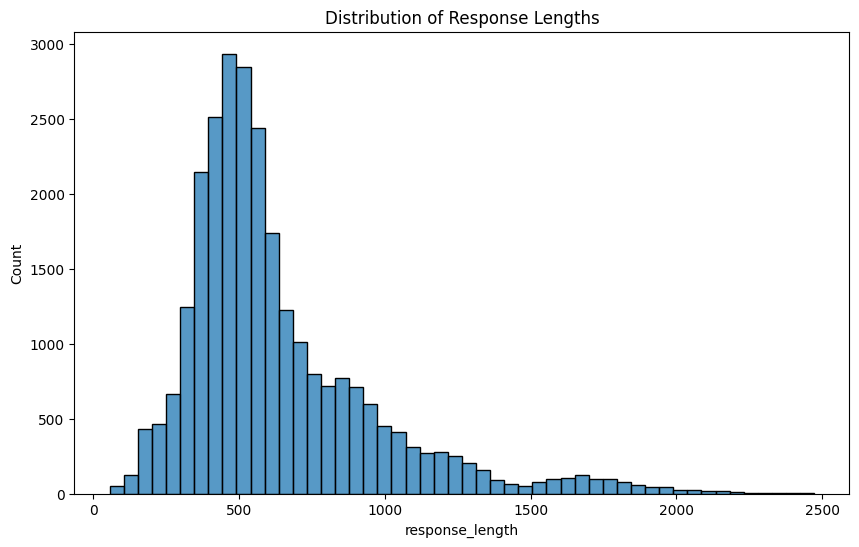

In [38]:
df['response_length'] = df['response'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['response_length'], bins=50)
plt.title("Distribution of Response Lengths")
plt.show()


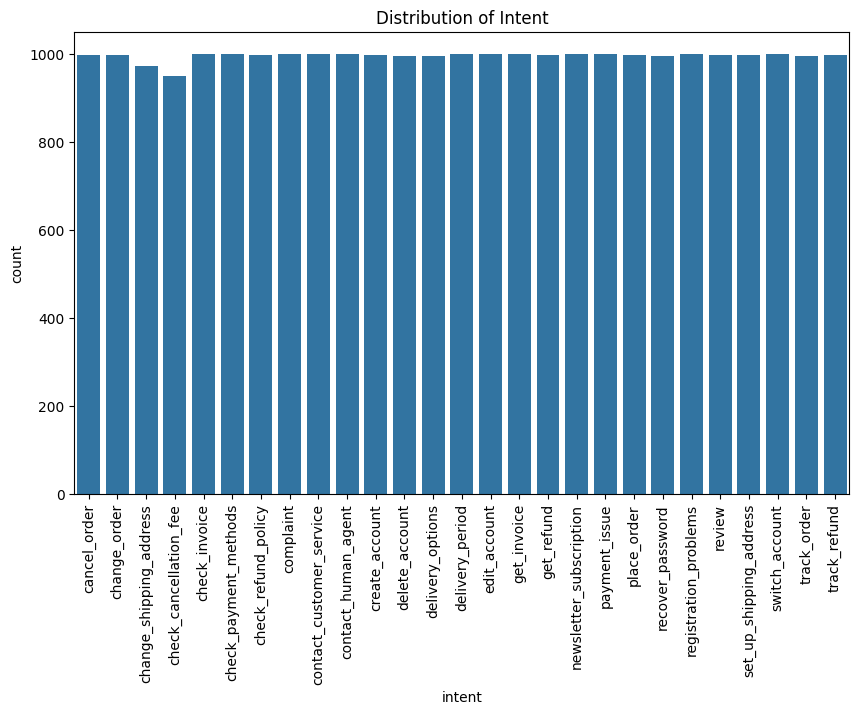

In [39]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='intent')
plt.xticks(rotation=90)
plt.title("Distribution of Intent")
plt.show()

In [40]:
# Group by intent and calculate summary statistics
intent_length_stats = df.groupby('intent')['response_length'].agg(['mean', 'min', 'max', 'median', 'std'])

# Display the results
intent_length_stats


,mean,min,max,median,std
intent,,,,,
cancel_order,1144.524048,97,2063,1203.0,268.218135
change_order,483.405216,221,1592,445.0,170.571524
change_shipping_address,308.081192,63,1215,267.0,141.708536
check_cancellation_fee,260.866316,58,638,249.0,101.290660
check_invoice,476.815000,192,1777,445.0,143.403045
check_payment_methods,779.235235,142,1529,795.0,225.506994
check_refund_policy,1615.886660,165,2472,1688.0,377.835478
complaint,586.030000,263,2002,547.0,202.459539
contact_customer_service,427.800000,179,1113,422.0,98.508669


- Mean: The average length of responses for each intent.
- Min & Max: The shortest and longest response lengths recorded.
- Median: The middle value, offering insight into the typical response length.
- Standard Deviation (std): Measures variation in response length, indicating  - - - - consistency or diversity in responses.

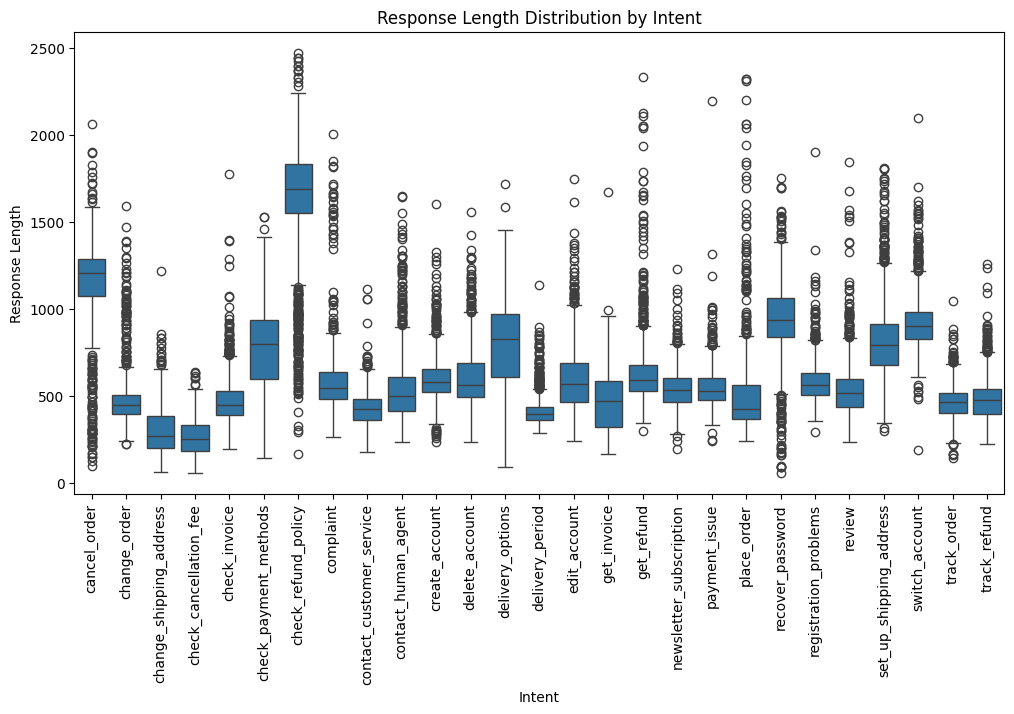

In [41]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='intent', y='response_length')
plt.xticks(rotation=90)
plt.title("Response Length Distribution by Intent")
plt.xlabel("Intent")
plt.ylabel("Response Length")
plt.show()

##### Observation
- Complex inquiries (e.g., check_refund_policy, cancel_order) tend to have longer responses, suggesting detailed explanations.
- Straightforward queries (e.g., track_order, check_cancellation_fee) generally have shorter responses, indicating concise replies.


In [42]:
category_length_stats = df.groupby('category')['response_length'].agg(['mean', 'min', 'max', 'median', 'std'])
category_length_stats

,mean,min,max,median,std
category,,,,,
ACCOUNT,707.843969,57,2095,648.0,233.581309
CANCEL,260.866316,58,638,249.0,101.290660
CONTACT,483.396198,179,1649,453.0,170.805760
DELIVERY,609.997492,92,1717,499.0,267.130058
FEEDBACK,561.917877,236,2002,533.0,187.028296
INVOICE,472.330165,167,1777,453.0,153.957133
ORDER,650.228185,97,2322,485.0,356.245424
PAYMENT,664.404404,142,2196,599.5,214.240814
REFUND,913.542447,165,2472,615.0,566.095854


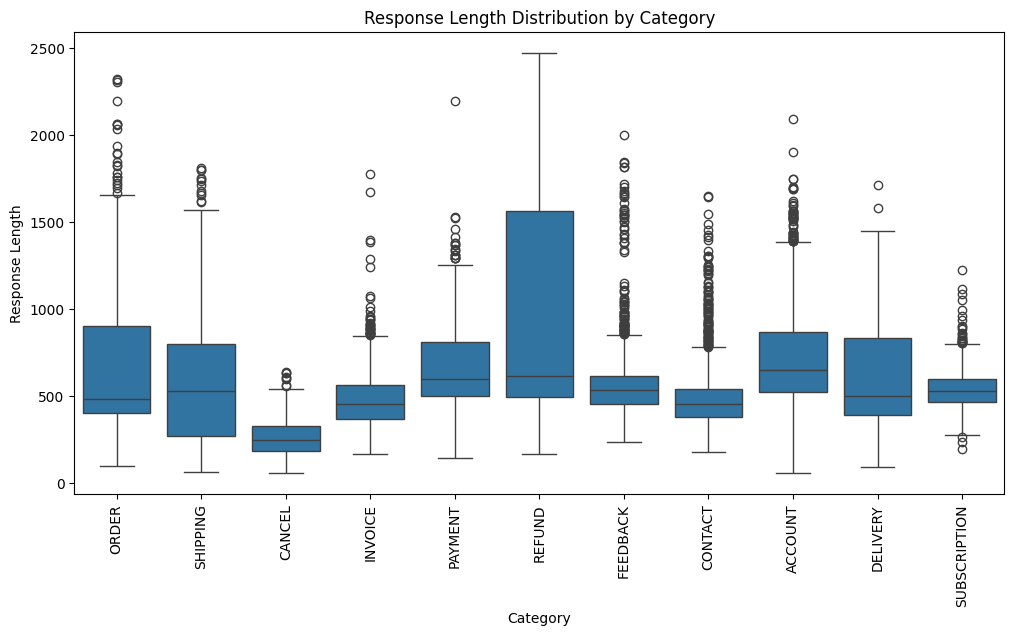

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='response_length')
plt.xticks(rotation=90)
plt.title("Response Length Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Response Length")
plt.show()

##### Observation

- Complex interactions, such as REFUND (mean: 913.54) and ACCOUNT (mean: 707.84), have longer responses, likely due to detailed explanations required.
- Shorter responses are seen in CANCEL (mean: 260.87), indicating straightforward resolutions.
- High standard deviation values, such as in REFUND (std: 566.09) and ORDER (std: 356.25), suggest significant variation in response length, potentially due to differing levels of query complexity within these categories.
- DELIVERY (mean: 609.99, std: 267.13) and PAYMENT (mean: 664.40, std: 214.24) exhibit moderate response lengths with some variability, indicating the need for flexibility in handling customer inquiries.

#### Text Polarity

In [44]:
from textblob import TextBlob
import nltk
nltk.download('punkt')

def get_polarity(text):
    return TextBlob(str(text)).sentiment.polarity  # Convert to string to handle NaN values


[nltk_data] Downloading package punkt to /home/mirsahib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
df["response_polarity"] = df["response"].apply(get_polarity)


In [46]:
category_sentiment = df.groupby("category")["response_polarity"].mean().reset_index()
category_sentiment

,category,response_polarity
0,ACCOUNT,0.268362
1,CANCEL,0.239889
2,CONTACT,0.280008
3,DELIVERY,0.309456
4,FEEDBACK,0.219239
5,INVOICE,0.182374
6,ORDER,0.251974
7,PAYMENT,0.234359
8,REFUND,0.208422
9,SHIPPING,0.182444


In [47]:
intent_sentiment = df.groupby("intent")["response_polarity"].mean().reset_index()
intent_sentiment

,intent,response_polarity
0,cancel_order,0.197614
1,change_order,0.265993
2,change_shipping_address,0.209626
3,check_cancellation_fee,0.239889
4,check_invoice,0.194805
5,check_payment_methods,0.228414
6,check_refund_policy,0.131342
7,complaint,0.111502
8,contact_customer_service,0.294058
9,contact_human_agent,0.265944


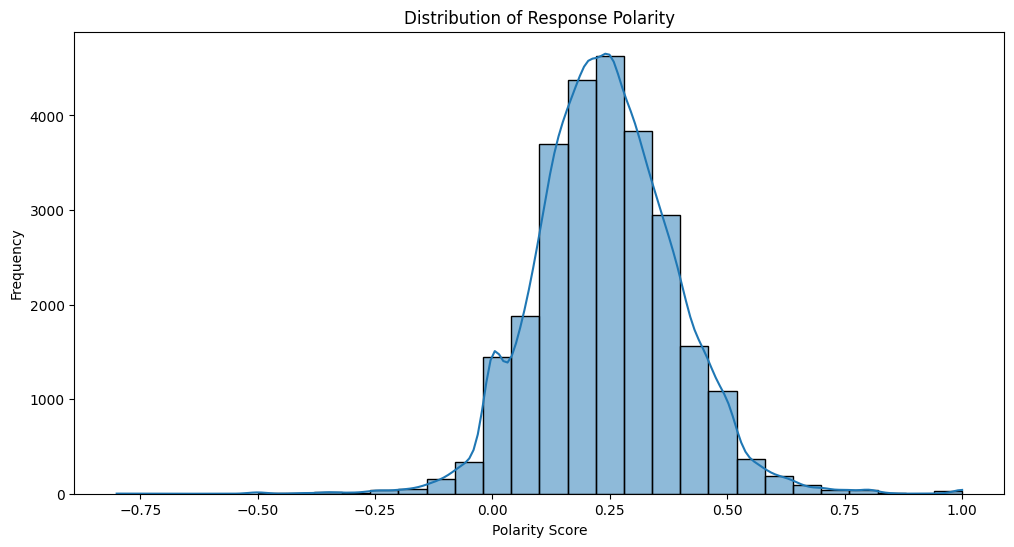

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(df["response_polarity"], bins=30, kde=True)
plt.title("Distribution of Response Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

In [49]:
category_polarity = df.groupby("category")["response_polarity"].describe()
category_polarity

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
ACCOUNT,5986.0,0.268362,0.132992,-0.500000,0.183333,0.268182,0.355556,1.000000
CANCEL,950.0,0.239889,0.183748,-0.350000,0.122619,0.225000,0.333333,1.000000
CONTACT,1999.0,0.280008,0.148439,-0.350000,0.178788,0.270130,0.378788,1.000000
DELIVERY,1994.0,0.309456,0.109228,-0.100000,0.233333,0.300000,0.383977,1.000000
FEEDBACK,1997.0,0.219239,0.201894,-0.500000,0.077172,0.213333,0.341667,1.000000
INVOICE,1999.0,0.182374,0.127113,-0.500000,0.096429,0.176389,0.256250,1.000000
ORDER,3988.0,0.251974,0.131976,-0.500000,0.159596,0.248983,0.333333,1.000000
PAYMENT,1998.0,0.234359,0.116365,-0.250000,0.167316,0.228571,0.300000,0.766667
REFUND,2992.0,0.208422,0.125656,-0.208333,0.120000,0.185714,0.283969,0.700000


In [50]:
intent_polarity = df.groupby("intent")["response_polarity"].describe()
intent_polarity

,count,mean,std,min,25%,50%,75%,max
intent,,,,,,,,
cancel_order,998.0,0.197614,0.107959,-0.500000,0.133766,0.187273,0.247971,1.000000
change_order,997.0,0.265993,0.152674,-0.133333,0.157143,0.256250,0.361111,1.000000
change_shipping_address,973.0,0.209626,0.202610,-0.500000,0.050000,0.202110,0.333333,1.000000
check_cancellation_fee,950.0,0.239889,0.183748,-0.350000,0.122619,0.225000,0.333333,1.000000
check_invoice,1000.0,0.194805,0.121850,-0.350000,0.112474,0.188413,0.272222,0.666667
check_payment_methods,999.0,0.228414,0.088821,-0.250000,0.176248,0.220192,0.270354,0.700000
check_refund_policy,997.0,0.131342,0.067849,-0.208333,0.090217,0.128256,0.167857,0.451429
complaint,1000.0,0.111502,0.163326,-0.500000,0.002286,0.100000,0.216721,0.700000
contact_customer_service,1000.0,0.294058,0.162440,-0.350000,0.181402,0.268750,0.400000,1.000000


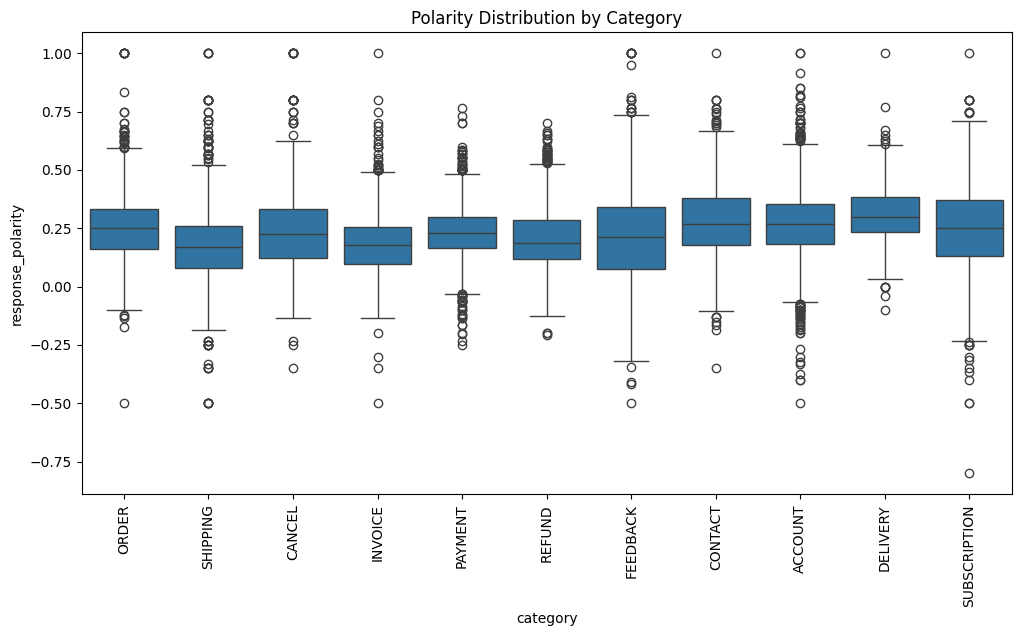

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="category", y="response_polarity", data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Polarity Distribution by Category")
plt.show()


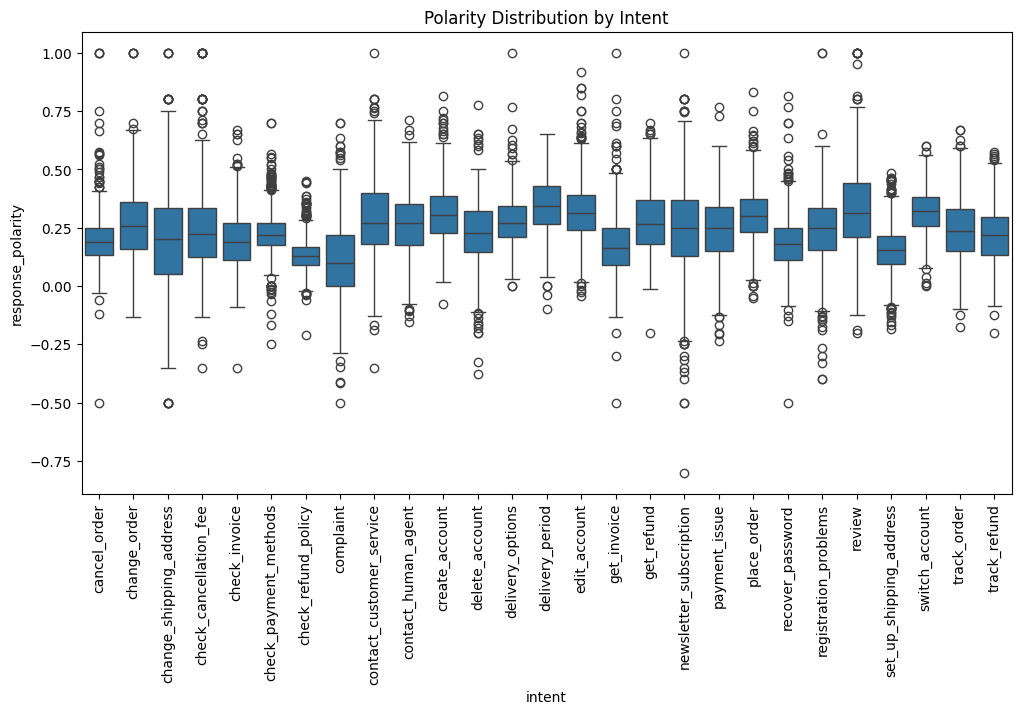

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="intent", y="response_polarity", data=df)
plt.xticks(rotation=90)
plt.title("Polarity Distribution by Intent")
plt.show()
